# Lecture  des données et import du model

In [8]:
import innvestigate
import numpy as np
from keras.models import load_model
model = load_model('model.h5')
import pickle

train_x = pickle.load(open('train_x.pickle', "rb"))
test_x = pickle.load(open('test_x.pickle', "rb"))
test_y = pickle.load(open('test_y.pickle', "rb"))

print(test_x.shape)
print(test_y.shape)
tests = np.append(test_x, test_y, axis=1)
print(tests)
print(tests.shape)
tests_sorted_by_class = tests[np.lexsort((tests[:,-6], tests[:,-5], tests[:,-4], tests[:,-3], tests[:,-2], tests[:,-1]))]


(692, 54630)
(692, 6)
[[167.519  263.551  173.786  ...   0.       0.       0.    ]
 [261.186  468.934  380.194  ...   0.       0.       0.    ]
 [104.034  177.553  205.691  ...   0.       0.       0.    ]
 ...
 [ 82.567  452.866  474.345  ...   0.       0.       0.    ]
 [340.387  577.848  313.712  ...   0.       0.       0.    ]
 [ 99.6991  84.5312  79.5479 ...   0.       0.       0.    ]]
(692, 54636)


# Séparation du dataset par ses classes

In [9]:
classes_index = {}
for i in range(1, 7):
    #print(i)
    #print(np.argwhere(tests_sorted_by_class[-i]>0))
    classes_index[str(6-i)]=np.argwhere(tests_sorted_by_class[-i]==1)

classes = {}
classes['0'] = []
classes['1'] = []
classes['2'] = []
classes['3'] = []
classes['4'] = []
classes['5'] = []
for i in tests_sorted_by_class:
    classes[str(list(i[-6:]).index(1))].append(i[:-6])
print(classes.keys())
for i in classes:
    print("Len "+str(i)+" = "+str(len(classes[i])))


dict_keys(['0', '1', '2', '3', '4', '5'])
Len 0 = 249
Len 1 = 168
Len 2 = 150
Len 3 = 29
Len 4 = 64
Len 5 = 32


In [10]:

methods = [
    ("lrp.z"),
    ]

analyzers = {}
method = methods[0]
print(methods)
print("Analyzer for Method : "+str(method))    
analyzer = innvestigate.create_analyzer(method, model)
analyzer.fit(train_x, batch_size=256, verbose=1)


['lrp.z']
Analyzer for Method : lrp.z


/home/raysamram/py_37_env/lib/python3.7/site-packages/innvestigate/analyzer/base.py:130: RuntimeWarning: This analyzer does not need to be trained. Still fit() is called.
  " Still fit() is called.", RuntimeWarning)


# Analyse de chaque classe avec LRP et sauvegarde des résultats

In [11]:
import os

classes_name = ["0" ,"1", "2", "3", "4", "5"]
analysis_results = {}
for i in classes_name:
    print("Analyzing for class "+str(i))
    tmp = []
    x = np.array(classes[i])
    analysis_results[i] = analyzer.analyze(x)
    print("analysis results shape : "+str(analysis_results[i].shape))
means = {}
for i in classes_name:
    print("class "+str(classes_name[int(i)]))
    mat = analysis_results[i]
    mean = mat.mean(0)
    means[i] = mean

Analyzing for class 0
analysis results shape : (249, 54630)
Analyzing for class 1
analysis results shape : (168, 54630)
Analyzing for class 2
analysis results shape : (150, 54630)
Analyzing for class 3
analysis results shape : (29, 54630)
Analyzing for class 4
analysis results shape : (64, 54630)
Analyzing for class 5
analysis results shape : (32, 54630)
class 0
class 1
class 2
class 3
class 4
class 5


# Import des analyses et représentation en HeatMap

toplot shape : (6, 54630)
[[-1.4239933e-05  3.0950127e-06 -5.6301149e-05 ...  5.3670198e-07
  -1.2782324e-05  5.5750952e-06]
 [-7.6539000e-04  4.4257168e-02 -2.2767238e-02 ...  7.7841706e-03
   1.5014231e-02  2.4488687e-03]
 [-9.4312963e-07  1.4101542e-05 -8.9340701e-06 ...  3.7942004e-06
   1.3536951e-05  1.3557378e-06]
 [-1.5049144e-04 -1.5326282e-04 -1.3020360e-04 ... -1.6442573e-06
  -1.4174641e-06 -8.3864961e-06]
 [-2.5276255e-05 -1.5095389e-04 -1.5271813e-04 ...  3.9304600e-06
  -1.0270206e-06  1.4728841e-05]
 [-5.9171898e-06 -2.1895766e-04 -1.4693053e-04 ... -4.9422601e-06
   2.5621121e-06  2.2155558e-05]]
SHAPE : (6, 54630)


Text(0.5, 156.5, 'Importance des variables')

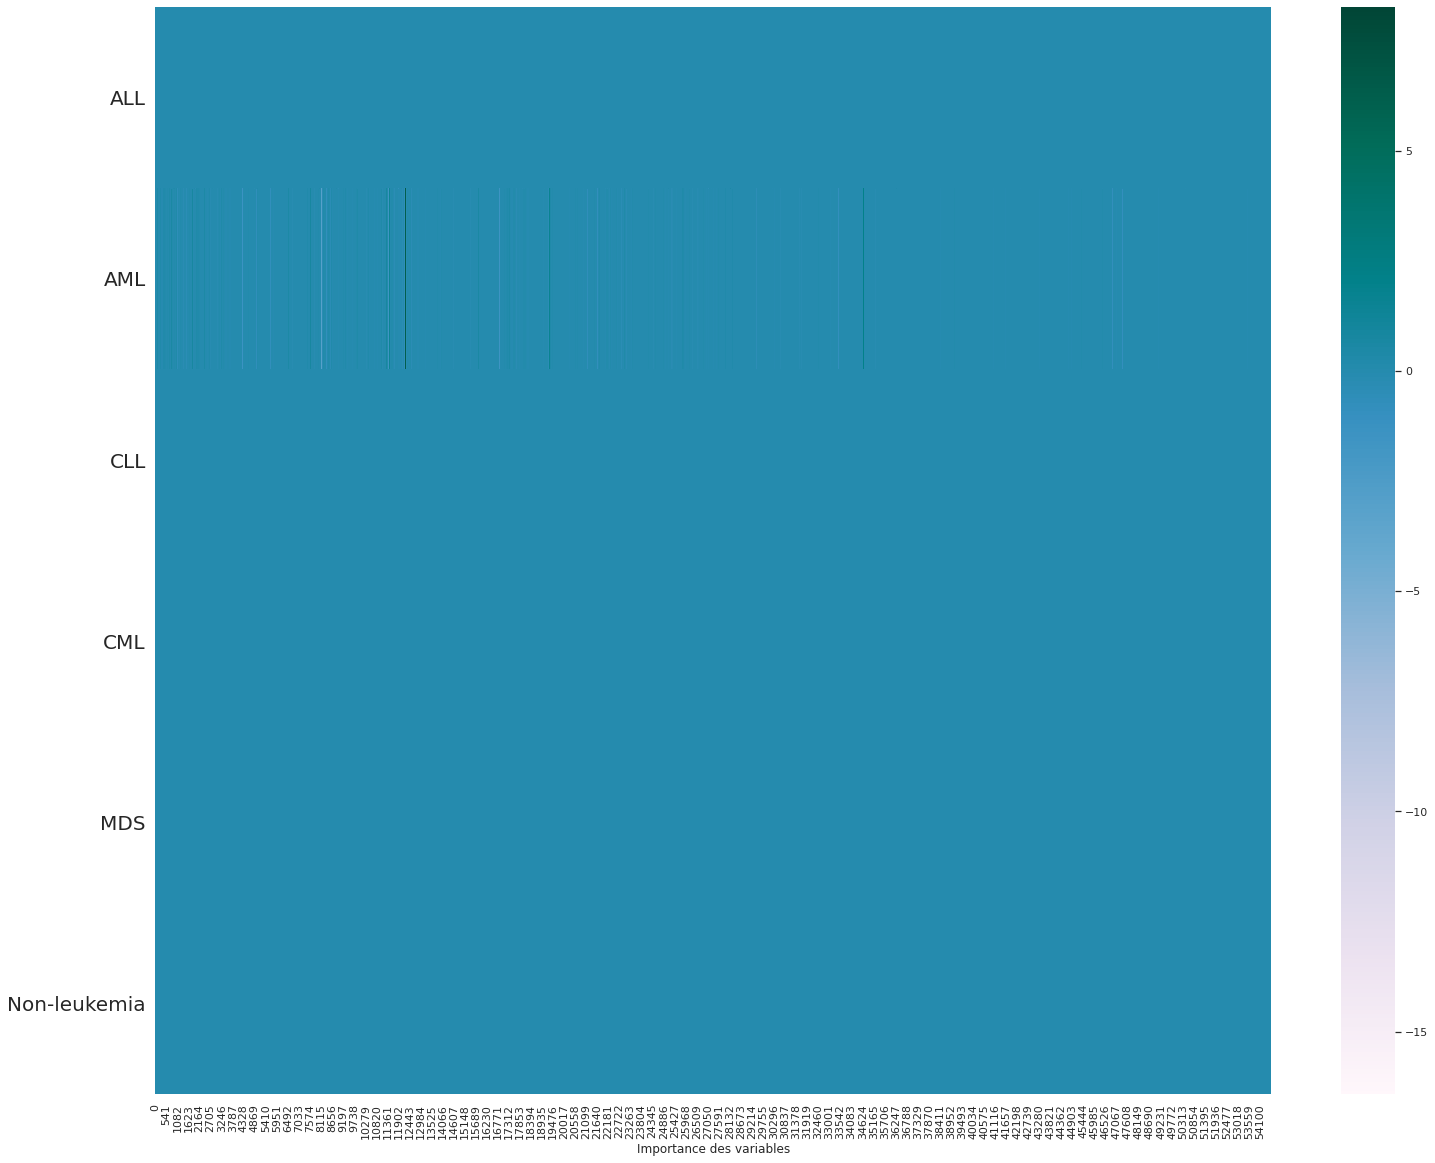

In [13]:
plots = []
sorted_plots = []
inverse_sort = []
classes_equivalents = ["ALL", "AML", "CLL", "CML", "MDS", "Non-leukemia"]
for i in means:
    plots.append(means[i])
toplot = np.array(plots)
print("toplot shape : "+str(toplot.shape))
print(str(toplot))
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
print("SHAPE : "+str(toplot.shape))

# We use ax parameter to tell seaborn which subplot to use for this plot
f,ax = plt.subplots(1,sharey=True)
f.set_figheight(20)
f.set_figwidth(25)

g1 = sns.heatmap(toplot,cmap="PuBuGn",ax=ax)
g1.set(yticklabels = classes_equivalents)
plt.yticks(fontsize=20, rotation=0)
g1.set_ylabel('')
g1.set_xlabel('Importance des variables')

# ACP et Clustering Hiéarchique

Class ALL


/home/raysamram/py_37_env/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


KeyboardInterrupt: 

<Figure size 576x432 with 0 Axes>

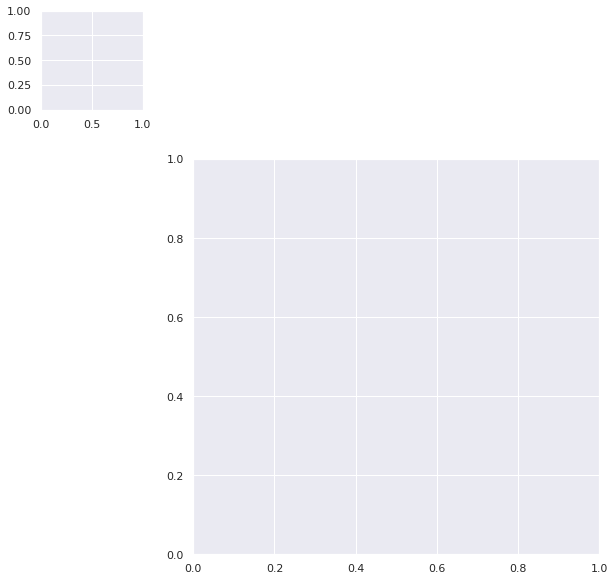

In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


import scipy.spatial as spatial
from sklearn.decomposition import PCA
classes_equivalents = ["ALL", "AML", "CLL", "CML", "MDS", "Non-leukemia"]

for i in range(6):
    print("Class "+str(classes_equivalents[i]))
    sc = StandardScaler()
    mat = analysis_results[str(i)]
    Z = sc.fit_transform(mat)
    acp = PCA(svd_solver='full', n_components=10)

    x_pca = acp.fit_transform(Z)
    plt.figure(figsize=(8,6))
    sns.clustermap(mat[0])
    plt.show()